# Import all required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Read CSV file

In [2]:
df = pd.read_csv("mprice.csv")
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


## Features names of df

- Variable Features:

1.battery_power :	Total energy a battery can store in one time measured in (mAh)

2.blue : Has bluetooth or not

3.clock_speed : Speed at which microprocessor executes instructions

4.dual_sim :	Has dual sim support or not

5.fc :	Front camera (Megapixels)

6.four_g : Has 4G or not

7.int_memory :Internal memory in (Gigabytes)

8.m_dep :	Mobile depth in (Cm)

9.mobile_wt : Weight of mobile phone

10.pc : Primary camera (Megapixels)

11.px_height : Pixel resolution height

12.px_width : Pixel resolution width

12.ram : Random access memory in (Megabytes)

13.sc_h : Screen height of mobile in (Cm)

14.sc_w : Screen width of mobile in (Cm)

15.talk_time : Longest time that a single battery charge will last when you are constantly talking on the phone

16.three_g : Has 3G or not

17.touch_screen : Has touch screen or not

18.wifi : Has wifi or not

19.n_cores : Number of cores of processor

20.price_range : This is the Target variable with value of 0: (Low Cost), 1: (Medium Cost), 2: (High Cost), and 3: (Very High Cost) 
    

## Drop unnecessary features


In [3]:
df = df.drop(['blue', 'clock_speed','px_height','px_width','three_g','talk_time','m_dep','pc'], axis=1)
df.head()


,battery_power,dual_sim,fc,four_g,int_memory,mobile_wt,n_cores,ram,sc_h,sc_w,touch_screen,wifi,price_range
0,842,0,1,0,7,188,2,2549,9,7,0,1,1
1,1021,1,0,1,53,136,3,2631,17,3,1,0,2
2,563,1,2,1,41,145,5,2603,11,2,1,0,2
3,615,0,0,0,10,131,6,2769,16,8,0,0,2
4,1821,0,13,1,44,141,2,1411,8,2,1,0,1


## New Features of new df

- Our Variable Features:

1.battery_power : Total energy a battery can store in one time measured in (mAh)

2.dual_sim : Has dual sim support or not

3.fc : Front camera (Megapixels)

4.four_g : Has 4G or not

5.int_memory :Internal memory in (Gigabytes)

6.mobile_wt : Weight of mobile phone

7.ram : Random access memory in (Megabytes)

8.sc_h : Screen height of mobile in (Cm)

9.sc_w : Screen width of mobile in (Cm)

10.touch_screen : Has touch screen or not

11.wifi : Has wifi or not

12.n_cores : Number of cores of processor

13.price_range : This is the Target variable with value of 0: (Low Cost), 1: (Medium Cost), 2: (High Cost), and 3: (Very High Cost) 
    

# Goal:- Given The Feature We need to Predict a price range indicating how high the price is.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   battery_power  2000 non-null   int64
 1   dual_sim       2000 non-null   int64
 2   fc             2000 non-null   int64
 3   four_g         2000 non-null   int64
 4   int_memory     2000 non-null   int64
 5   mobile_wt      2000 non-null   int64
 6   n_cores        2000 non-null   int64
 7   ram            2000 non-null   int64
 8   sc_h           2000 non-null   int64
 9   sc_w           2000 non-null   int64
 10  touch_screen   2000 non-null   int64
 11  wifi           2000 non-null   int64
 12  price_range    2000 non-null   int64
dtypes: int64(13)
memory usage: 203.2 KB


In [5]:
df.isna().sum()

battery_power    0
dual_sim         0
fc               0
four_g           0
int_memory       0
mobile_wt        0
n_cores          0
ram              0
sc_h             0
sc_w             0
touch_screen     0
wifi             0
price_range      0
dtype: int64

# Visualization

In [6]:
df["price_range"].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

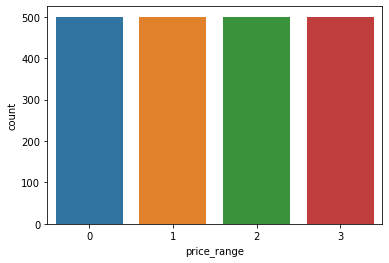

In [7]:
sns.countplot(data=df, x="price_range")
plt.show()

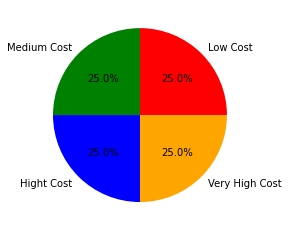

In [8]:
plt.pie(df["price_range"].value_counts(),labels=["Low Cost","Medium Cost","Hight Cost","Very High Cost"],autopct="%1.1f%%", colors=["red","green","blue","orange"])
plt.show()

Conclusion:

    Mobile phones are divided with the same frequency across the 4 price_range classes. Therefore, the dataset is completely balanced.

In [9]:
df.describe()

,battery_power,dual_sim,fc,four_g,int_memory,mobile_wt,n_cores,ram,sc_h,sc_w,touch_screen,wifi,price_range
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.509500,4.309500,0.521500,32.046500,140.249000,4.520500,2124.213000,12.306500,5.767000,0.503000,0.507000,1.500000
std,439.418206,0.500035,4.341444,0.499662,18.145715,35.399655,2.287837,1084.732044,4.213245,4.356398,0.500116,0.500076,1.118314
min,501.000000,0.000000,0.000000,0.000000,2.000000,80.000000,1.000000,256.000000,5.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.000000,1.000000,0.000000,16.000000,109.000000,3.000000,1207.500000,9.000000,2.000000,0.000000,0.000000,0.750000
50%,1226.000000,1.000000,3.000000,1.000000,32.000000,141.000000,4.000000,2146.500000,12.000000,5.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.000000,7.000000,1.000000,48.000000,170.000000,7.000000,3064.500000,16.000000,9.000000,1.000000,1.000000,2.250000
max,1998.000000,1.000000,19.000000,1.000000,64.000000,200.000000,8.000000,3998.000000,19.000000,18.000000,1.000000,1.000000,3.000000


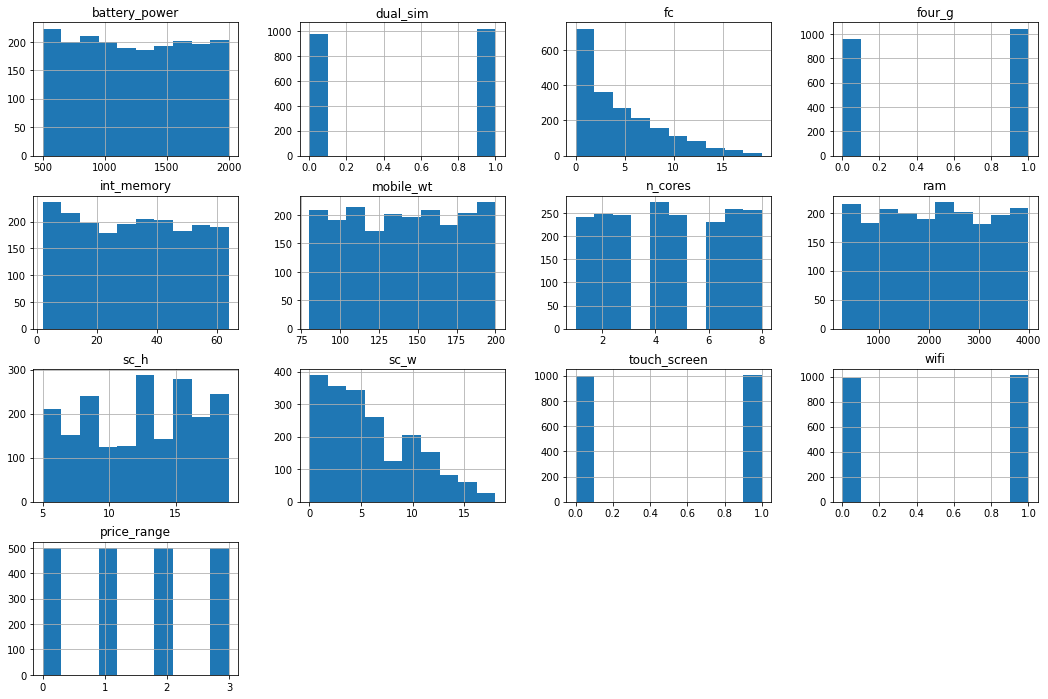

In [10]:
df.hist(figsize=(18,12))
plt.show()

In [11]:
df.corr()

,battery_power,dual_sim,fc,four_g,int_memory,mobile_wt,n_cores,ram,sc_h,sc_w,touch_screen,wifi,price_range
battery_power,1.000000,-0.041847,0.033334,0.015665,-0.004004,0.001844,-0.029727,-0.000653,-0.029959,-0.021421,-0.010516,-0.008343,0.200723
dual_sim,-0.041847,1.000000,-0.029123,0.003187,-0.015679,-0.008979,-0.024658,0.041072,-0.011949,-0.016666,-0.017117,0.022740,0.017444
fc,0.033334,-0.029123,1.000000,-0.016560,-0.029133,0.023618,-0.013356,0.015099,-0.011014,-0.012373,-0.014828,0.020085,0.021998
four_g,0.015665,0.003187,-0.016560,1.000000,0.008690,-0.016537,-0.029706,0.007313,0.027166,0.037005,0.016758,-0.017620,0.014772
int_memory,-0.004004,-0.015679,-0.029133,0.008690,1.000000,-0.034214,-0.028310,0.032813,0.037771,0.011731,-0.026999,0.006993,0.044435
mobile_wt,0.001844,-0.008979,0.023618,-0.016537,-0.034214,1.000000,-0.018989,-0.002581,-0.033855,-0.020761,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,-0.024658,-0.013356,-0.029706,-0.028310,-0.018989,1.000000,0.004868,-0.000315,0.025826,0.023774,-0.009964,0.004399
ram,-0.000653,0.041072,0.015099,0.007313,0.032813,-0.002581,0.004868,1.000000,0.015996,0.035576,-0.030455,0.022669,0.917046
sc_h,-0.029959,-0.011949,-0.011014,0.027166,0.037771,-0.033855,-0.000315,0.015996,1.000000,0.506144,-0.020023,0.025929,0.022986
sc_w,-0.021421,-0.016666,-0.012373,0.037005,0.011731,-0.020761,0.025826,0.035576,0.506144,1.000000,0.012720,0.035423,0.038711


Conclusion: 
The correlation measures the strength of the linear relationship between two variables. It has a value between -1 to 1, with a value of -1 meaning a total negative linear correlation, 0 being no correlation, and + 1 meaning a total positive correlation.

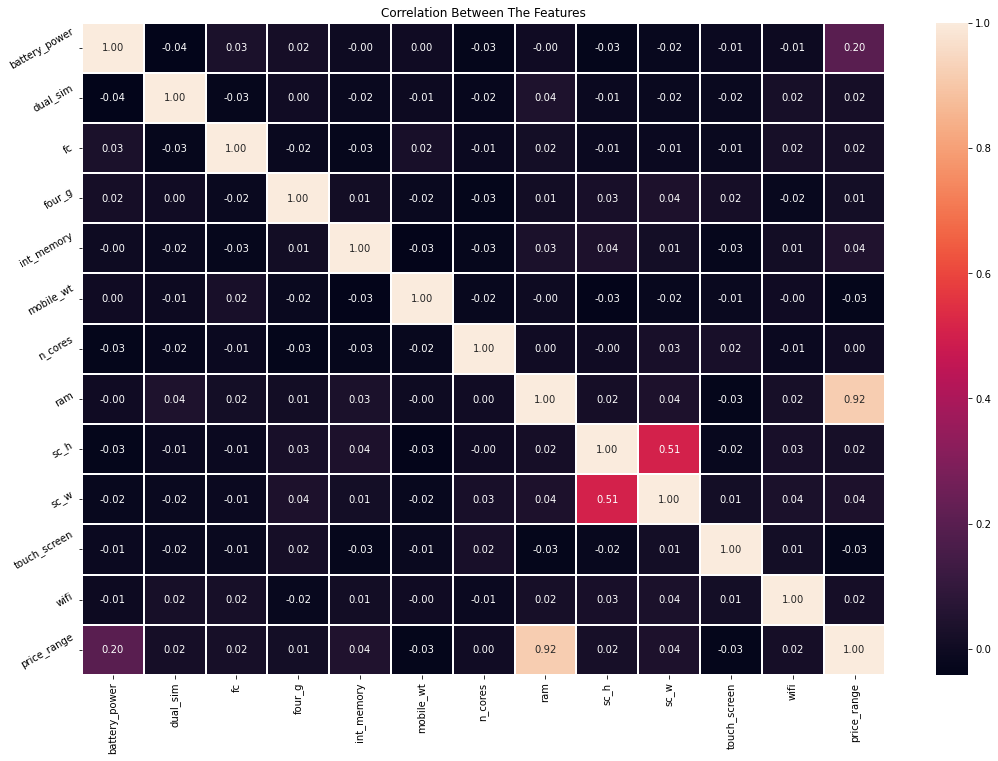

In [12]:
fig=plt.gcf()
fig.set_size_inches(18, 12)
plt.title('Correlation Between The Features')
a = sns.heatmap(df.corr(), annot = True, fmt='.2f', linewidths=0.2)
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)
plt.show()

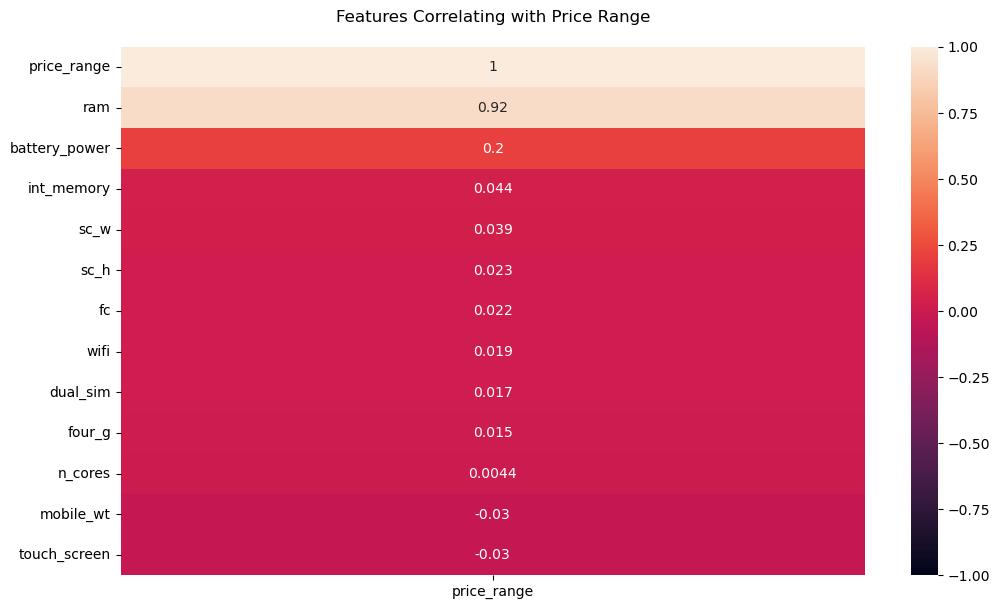

In [13]:
plt.figure (figsize = (12, 7), dpi = 100)
heatmap = sns.heatmap (df.corr()[['price_range']].sort_values (by = 'price_range', ascending = False), vmin = -1, vmax = 1, annot = True)
heatmap.set_title ('Features Correlating with Price Range', fontdict = {'fontsize':12}, pad = 18);


Conclusion:

    There is a strong correlation between ram and price_range.
    price_range has a low correlation value with the rest of the features, but this cannot be used as a criterion to remove these features since the pearson correlation only expresses the linear relationship between two variables.
    We can see a moderate correlation between sc_h and sc_w.



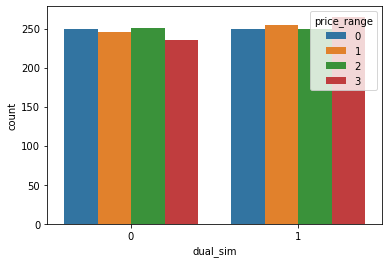

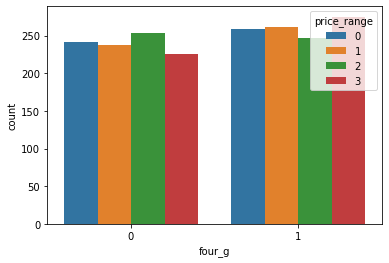

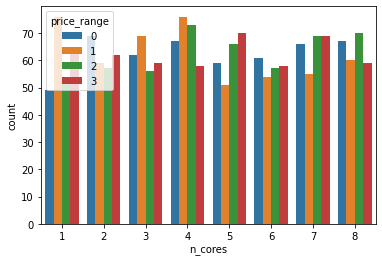

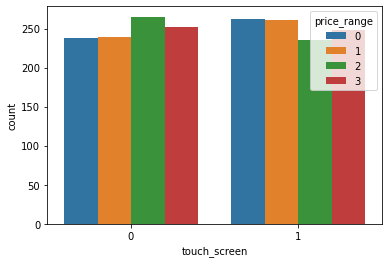

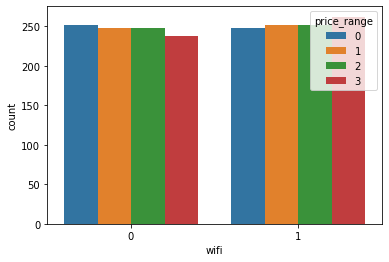

In [14]:
def create_countplothue(x,data):
    sns.countplot(x=x, data=data, hue="price_range")
    plt.show()
for feature in ["dual_sim","four_g","n_cores","touch_screen","wifi"]:
    create_countplothue(x = feature, data = df)

We see almost the same frequency in terms of having or not having 4G, two SIM cards, touch screen and the number of processing cores used.

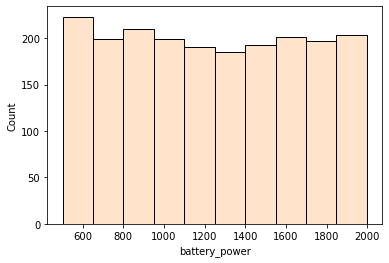

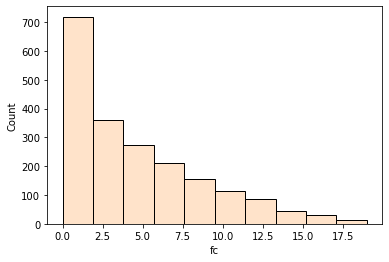

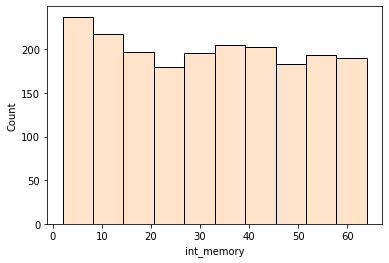

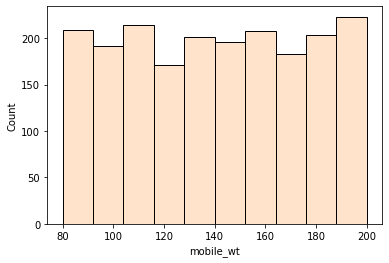

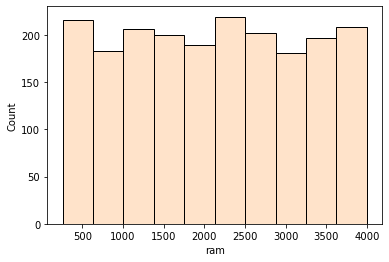

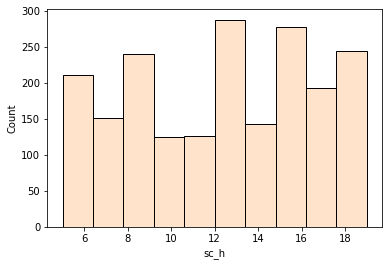

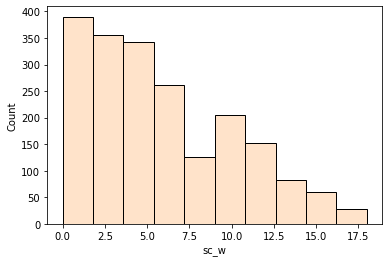

In [15]:
def create_histplot(x,data):
    sns.histplot(x=x, data=data,color="peachpuff",bins=10)
    plt.show()

for feature in ['battery_power', 'fc', 'int_memory', 'mobile_wt', 'ram', 'sc_h', 'sc_w']:
    create_histplot(x=feature, data=df)

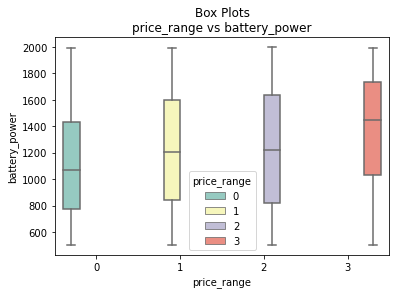

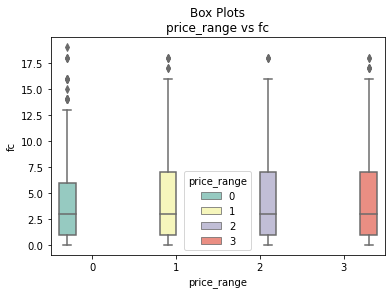

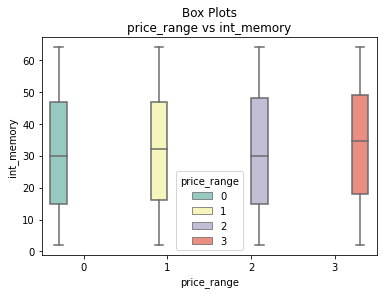

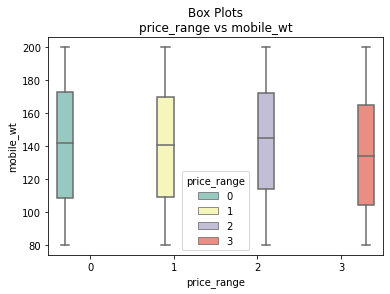

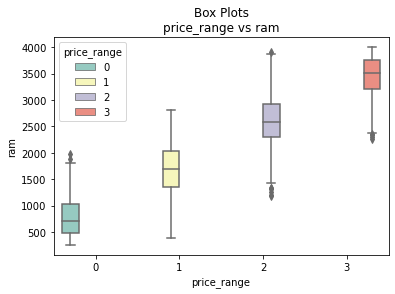

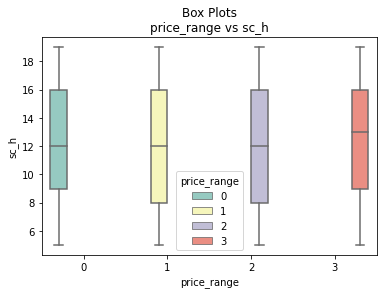

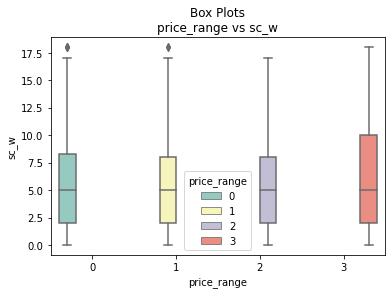

In [16]:
def create_boxplot(data, x, y):
    fig = sns.boxplot(data=data, x=x, y=y, hue='price_range', palette='Set3')
    fig.set(title=f"Box Plots\n{x} vs {y}")
    plt.show()

for feature in ['battery_power', 'fc', 'int_memory', 'mobile_wt', 'ram', 'sc_h', 'sc_w']:
    create_boxplot(data=df, x='price_range', y=feature)




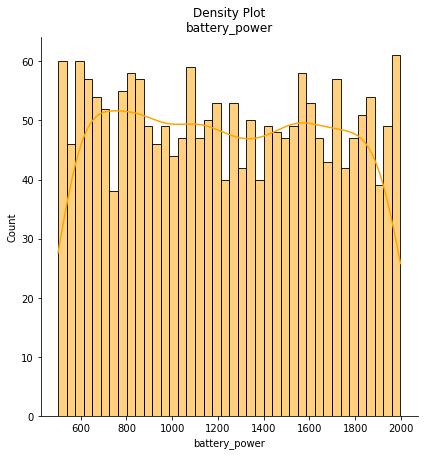

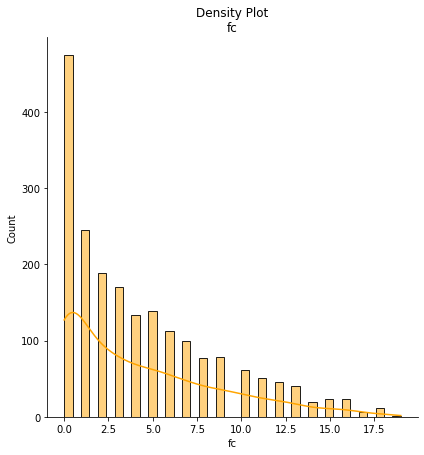

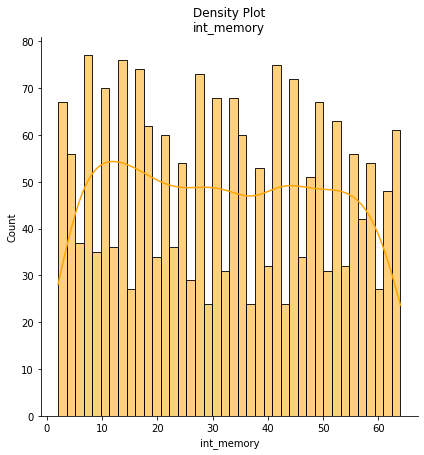

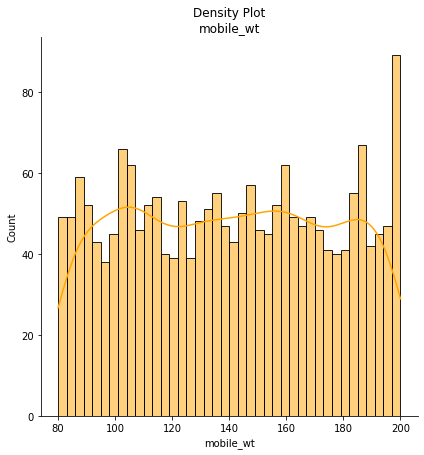

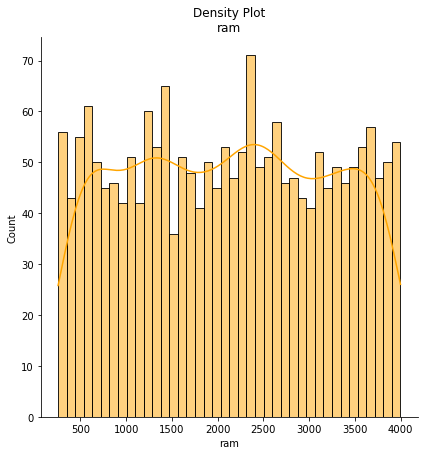

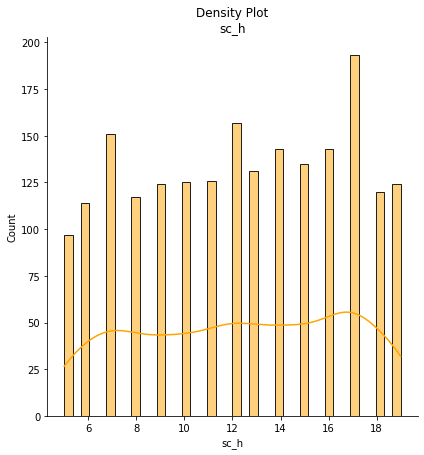

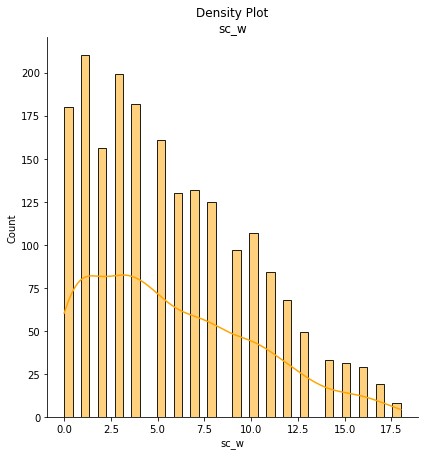

In [17]:
def displot(data,x):
    sns.displot(data=data,x=x,kde=True,bins=40, color="orange", height=6).set(title=(f"Density Plot\n{x}"))
    fig.show()
    
for feature in ['battery_power', 'fc', 'int_memory', 'mobile_wt', 'ram', 'sc_h', 'sc_w']:
    displot(data=df, x = feature)

# Separating of X and Y

In [18]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [19]:
x

,battery_power,dual_sim,fc,four_g,int_memory,mobile_wt,n_cores,ram,sc_h,sc_w,touch_screen,wifi
0,842,0,1,0,7,188,2,2549,9,7,0,1
1,1021,1,0,1,53,136,3,2631,17,3,1,0
2,563,1,2,1,41,145,5,2603,11,2,1,0
3,615,0,0,0,10,131,6,2769,16,8,0,0
4,1821,0,13,1,44,141,2,1411,8,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0,1,2,106,6,668,13,4,1,0
1996,1965,1,0,0,39,187,4,2032,11,10,1,1
1997,1911,1,1,1,36,108,8,3057,9,1,1,0
1998,1512,0,4,1,46,145,5,869,18,10,1,1


In [20]:
y

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

# Train Test Split

In [21]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=1)

# Model Building

In [22]:
from sklearn.metrics import classification_report, accuracy_score

In [23]:
def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    
    train = model.score(xtrain,ytrain)
    test = model.score(xtest,ytest)
    
    print(f"Training Accuracy :- {train}\n Testing Accuracy:- {test}")
    
    print(classification_report(ytest,ypred))
    return model

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from  sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [25]:
knn = mymodel(KNeighborsClassifier()) #low bias and high varience ==> overfitting

Training Accuracy :- 0.8492857142857143
 Testing Accuracy:- 0.7783333333333333
              precision    recall  f1-score   support

           0       0.88      0.91      0.90       135
           1       0.72      0.77      0.74       149
           2       0.70      0.68      0.69       168
           3       0.84      0.78      0.81       148

    accuracy                           0.78       600
   macro avg       0.78      0.78      0.78       600
weighted avg       0.78      0.78      0.78       600



In [26]:
logreg = mymodel(LogisticRegression())

Training Accuracy :- 0.6535714285714286
 Testing Accuracy:- 0.6266666666666667
              precision    recall  f1-score   support

           0       0.80      0.81      0.81       135
           1       0.56      0.59      0.57       149
           2       0.52      0.40      0.45       168
           3       0.64      0.75      0.69       148

    accuracy                           0.63       600
   macro avg       0.63      0.64      0.63       600
weighted avg       0.62      0.63      0.62       600



In [27]:
svm = mymodel(SVC())

Training Accuracy :- 0.8342857142857143
 Testing Accuracy:- 0.805
              precision    recall  f1-score   support

           0       0.90      0.91      0.91       135
           1       0.76      0.81      0.78       149
           2       0.73      0.71      0.72       168
           3       0.85      0.81      0.83       148

    accuracy                           0.81       600
   macro avg       0.81      0.81      0.81       600
weighted avg       0.81      0.81      0.80       600



In [28]:
dt = mymodel(DecisionTreeClassifier()) #low bias and high varience ==> overfitting

Training Accuracy :- 1.0
 Testing Accuracy:- 0.7283333333333334
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       135
           1       0.66      0.68      0.67       149
           2       0.63      0.62      0.62       168
           3       0.79      0.77      0.78       148

    accuracy                           0.73       600
   macro avg       0.74      0.74      0.74       600
weighted avg       0.73      0.73      0.73       600



In [29]:
models = []
accuracy = []


models.append(("logreg",LogisticRegression()))
models.append(("DT",DecisionTreeClassifier()))
models.append(("DT-e",DecisionTreeClassifier(criterion="entropy")))
models.append(("KNN",KNeighborsClassifier()))
models.append(("svm",SVC()))



for name,model in models:
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    
    ac = accuracy_score(ytest,ypred)
    accuracy.append(ac)
    
arr = np.array(accuracy)
print(f"Avg Accuracy:- {arr.mean()}")

Avg Accuracy:- 0.7383333333333334


In [30]:
models

[('logreg', LogisticRegression()),
 ('DT', DecisionTreeClassifier()),
 ('DT-e', DecisionTreeClassifier(criterion='entropy')),
 ('KNN', KNeighborsClassifier()),
 ('svm', SVC())]

In [31]:
accuracy

[0.6266666666666667,
 0.7333333333333333,
 0.7483333333333333,
 0.7783333333333333,
 0.805]

## Hyperparameter Tuning For KNN :- 

In [32]:
for i in range(1,31):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    
    train = knn.score(xtrain,ytrain)
    test = knn.score(xtest,ytest)
   
    print(f"{i}  {train}  {test} {train-test}")

1  1.0  0.7333333333333333 0.2666666666666667
2  0.8728571428571429  0.7633333333333333 0.10952380952380958
3  0.8892857142857142  0.7733333333333333 0.11595238095238092
4  0.8628571428571429  0.78 0.08285714285714285
5  0.8492857142857143  0.7783333333333333 0.07095238095238099
6  0.8478571428571429  0.78 0.06785714285714284
7  0.8428571428571429  0.7816666666666666 0.06119047619047624
8  0.8428571428571429  0.7816666666666666 0.06119047619047624
9  0.8464285714285714  0.7783333333333333 0.0680952380952381
10  0.8428571428571429  0.78 0.06285714285714283
11  0.84  0.785 0.05499999999999994
12  0.8407142857142857  0.78 0.06071428571428572
13  0.8407142857142857  0.7916666666666666 0.04904761904761912
14  0.8457142857142858  0.7883333333333333 0.05738095238095242
15  0.8378571428571429  0.7916666666666666 0.046190476190476226
16  0.8392857142857143  0.7916666666666666 0.04761904761904767
17  0.8435714285714285  0.79 0.05357142857142849
18  0.8428571428571429  0.7966666666666666 0.046190

In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=27)
knn.fit(xtrain,ytrain)
ypred = knn.predict(xtest)

from sklearn.metrics import classification_report,confusion_matrix
print(f"Training Accuracy :- {train}\n Testing Accuracy:- {test}")  #low bias and high varience ==> overfitting

print(classification_report(ytest,ypred))

Training Accuracy :- 0.8392857142857143
 Testing Accuracy:- 0.7966666666666666
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       135
           1       0.75      0.79      0.77       149
           2       0.71      0.70      0.71       168
           3       0.87      0.80      0.84       148

    accuracy                           0.80       600
   macro avg       0.81      0.81      0.81       600
weighted avg       0.80      0.80      0.80       600



## Grid Search CV For Decision Tree

In [34]:
parameter = {
           "criterion":["gini","entropy"],
           "max_depth":list(range(1,20)),
           "min_samples_leaf":list(range(1,20))
}

In [35]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(DecisionTreeClassifier(), parameter, verbose=2)
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 722 candidates, totalling 3610 fits
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=3; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min

[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=3; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=3; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=3; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=3; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=3; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=4; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=4; total time=   0.0s
[CV] END ....criterion=gini, max_depth=2, min_samples_leaf=4; total time=   0.0s
[CV] END ....criterion=gini,

[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=4; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=4; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=6; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=6; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=6; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=6; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=6; total time=   0.0s
[CV] END ....criterion=gini,

[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=9; total time=   0.0s
[CV] END ....criterion=gini, max_depth=4, min_samples_leaf=9; total time=   0.0s
[CV] END ...criterion=gini, max_depth=4, min_samples_leaf=10; total time=   0.0s
[CV] END ...criterion=gini, max_depth=4, min_samples_leaf=10; total time=   0.0s
[CV] END ...criterion=gini, max_depth=4, min_samples_leaf=10; total time=   0.0s
[CV] END ...criterion=gini, max_depth=4, min_samples_leaf=10; total time=   0.0s
[CV] END ...criterion=gini, max_depth=4, min_samples_leaf=10; total time=   0.0s
[CV] END ...criterion=gini, max_depth=4, min_samples_leaf=11; total time=   0.0s
[CV] END ...criterion=gini, max_depth=4, min_samples_leaf=11; total time=   0.0s
[CV] END ...criterion=gini, max_depth=4, min_samples_leaf=11; total time=   0.0s
[CV] END ...criterion=gini, max_depth=4, min_samples_leaf=11; total time=   0.0s
[CV] END ...criterion=gini, max_depth=4, min_samples_leaf=11; total time=   0.0s
[CV] END ...criterion=gini, 

[CV] END ...criterion=gini, max_depth=5, min_samples_leaf=12; total time=   0.0s
[CV] END ...criterion=gini, max_depth=5, min_samples_leaf=13; total time=   0.0s
[CV] END ...criterion=gini, max_depth=5, min_samples_leaf=13; total time=   0.0s
[CV] END ...criterion=gini, max_depth=5, min_samples_leaf=13; total time=   0.0s
[CV] END ...criterion=gini, max_depth=5, min_samples_leaf=13; total time=   0.0s
[CV] END ...criterion=gini, max_depth=5, min_samples_leaf=13; total time=   0.0s
[CV] END ...criterion=gini, max_depth=5, min_samples_leaf=14; total time=   0.0s
[CV] END ...criterion=gini, max_depth=5, min_samples_leaf=14; total time=   0.0s
[CV] END ...criterion=gini, max_depth=5, min_samples_leaf=14; total time=   0.0s
[CV] END ...criterion=gini, max_depth=5, min_samples_leaf=14; total time=   0.0s
[CV] END ...criterion=gini, max_depth=5, min_samples_leaf=14; total time=   0.0s
[CV] END ...criterion=gini, max_depth=5, min_samples_leaf=15; total time=   0.0s
[CV] END ...criterion=gini, 

[CV] END ...criterion=gini, max_depth=6, min_samples_leaf=14; total time=   0.0s
[CV] END ...criterion=gini, max_depth=6, min_samples_leaf=14; total time=   0.0s
[CV] END ...criterion=gini, max_depth=6, min_samples_leaf=14; total time=   0.0s
[CV] END ...criterion=gini, max_depth=6, min_samples_leaf=15; total time=   0.0s
[CV] END ...criterion=gini, max_depth=6, min_samples_leaf=15; total time=   0.0s
[CV] END ...criterion=gini, max_depth=6, min_samples_leaf=15; total time=   0.0s
[CV] END ...criterion=gini, max_depth=6, min_samples_leaf=15; total time=   0.0s
[CV] END ...criterion=gini, max_depth=6, min_samples_leaf=15; total time=   0.0s
[CV] END ...criterion=gini, max_depth=6, min_samples_leaf=16; total time=   0.0s
[CV] END ...criterion=gini, max_depth=6, min_samples_leaf=16; total time=   0.0s
[CV] END ...criterion=gini, max_depth=6, min_samples_leaf=16; total time=   0.0s
[CV] END ...criterion=gini, max_depth=6, min_samples_leaf=16; total time=   0.0s
[CV] END ...criterion=gini, 

[CV] END ...criterion=gini, max_depth=7, min_samples_leaf=15; total time=   0.0s
[CV] END ...criterion=gini, max_depth=7, min_samples_leaf=16; total time=   0.0s
[CV] END ...criterion=gini, max_depth=7, min_samples_leaf=16; total time=   0.0s
[CV] END ...criterion=gini, max_depth=7, min_samples_leaf=16; total time=   0.0s
[CV] END ...criterion=gini, max_depth=7, min_samples_leaf=16; total time=   0.0s
[CV] END ...criterion=gini, max_depth=7, min_samples_leaf=16; total time=   0.0s
[CV] END ...criterion=gini, max_depth=7, min_samples_leaf=17; total time=   0.0s
[CV] END ...criterion=gini, max_depth=7, min_samples_leaf=17; total time=   0.0s
[CV] END ...criterion=gini, max_depth=7, min_samples_leaf=17; total time=   0.0s
[CV] END ...criterion=gini, max_depth=7, min_samples_leaf=17; total time=   0.0s
[CV] END ...criterion=gini, max_depth=7, min_samples_leaf=17; total time=   0.0s
[CV] END ...criterion=gini, max_depth=7, min_samples_leaf=18; total time=   0.0s
[CV] END ...criterion=gini, 

[CV] END ...criterion=gini, max_depth=8, min_samples_leaf=19; total time=   0.0s
[CV] END ...criterion=gini, max_depth=8, min_samples_leaf=19; total time=   0.0s
[CV] END ....criterion=gini, max_depth=9, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=9, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=9, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=9, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=9, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=9, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=9, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=9, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=9, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=9, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini,

[CV] END ...criterion=gini, max_depth=10, min_samples_leaf=3; total time=   0.0s
[CV] END ...criterion=gini, max_depth=10, min_samples_leaf=3; total time=   0.0s
[CV] END ...criterion=gini, max_depth=10, min_samples_leaf=3; total time=   0.0s
[CV] END ...criterion=gini, max_depth=10, min_samples_leaf=4; total time=   0.0s
[CV] END ...criterion=gini, max_depth=10, min_samples_leaf=4; total time=   0.0s
[CV] END ...criterion=gini, max_depth=10, min_samples_leaf=4; total time=   0.0s
[CV] END ...criterion=gini, max_depth=10, min_samples_leaf=4; total time=   0.0s
[CV] END ...criterion=gini, max_depth=10, min_samples_leaf=4; total time=   0.0s
[CV] END ...criterion=gini, max_depth=10, min_samples_leaf=5; total time=   0.0s
[CV] END ...criterion=gini, max_depth=10, min_samples_leaf=5; total time=   0.0s
[CV] END ...criterion=gini, max_depth=10, min_samples_leaf=5; total time=   0.0s
[CV] END ...criterion=gini, max_depth=10, min_samples_leaf=5; total time=   0.0s
[CV] END ...criterion=gini, 

[CV] END ...criterion=gini, max_depth=11, min_samples_leaf=6; total time=   0.0s
[CV] END ...criterion=gini, max_depth=11, min_samples_leaf=7; total time=   0.0s
[CV] END ...criterion=gini, max_depth=11, min_samples_leaf=7; total time=   0.0s
[CV] END ...criterion=gini, max_depth=11, min_samples_leaf=7; total time=   0.0s
[CV] END ...criterion=gini, max_depth=11, min_samples_leaf=7; total time=   0.0s
[CV] END ...criterion=gini, max_depth=11, min_samples_leaf=7; total time=   0.0s
[CV] END ...criterion=gini, max_depth=11, min_samples_leaf=8; total time=   0.0s
[CV] END ...criterion=gini, max_depth=11, min_samples_leaf=8; total time=   0.0s
[CV] END ...criterion=gini, max_depth=11, min_samples_leaf=8; total time=   0.0s
[CV] END ...criterion=gini, max_depth=11, min_samples_leaf=8; total time=   0.0s
[CV] END ...criterion=gini, max_depth=11, min_samples_leaf=8; total time=   0.0s
[CV] END ...criterion=gini, max_depth=11, min_samples_leaf=9; total time=   0.0s
[CV] END ...criterion=gini, 

[CV] END ..criterion=gini, max_depth=12, min_samples_leaf=10; total time=   0.0s
[CV] END ..criterion=gini, max_depth=12, min_samples_leaf=11; total time=   0.0s
[CV] END ..criterion=gini, max_depth=12, min_samples_leaf=11; total time=   0.0s
[CV] END ..criterion=gini, max_depth=12, min_samples_leaf=11; total time=   0.0s
[CV] END ..criterion=gini, max_depth=12, min_samples_leaf=11; total time=   0.0s
[CV] END ..criterion=gini, max_depth=12, min_samples_leaf=11; total time=   0.0s
[CV] END ..criterion=gini, max_depth=12, min_samples_leaf=12; total time=   0.0s
[CV] END ..criterion=gini, max_depth=12, min_samples_leaf=12; total time=   0.0s
[CV] END ..criterion=gini, max_depth=12, min_samples_leaf=12; total time=   0.0s
[CV] END ..criterion=gini, max_depth=12, min_samples_leaf=12; total time=   0.0s
[CV] END ..criterion=gini, max_depth=12, min_samples_leaf=12; total time=   0.0s
[CV] END ..criterion=gini, max_depth=12, min_samples_leaf=13; total time=   0.0s
[CV] END ..criterion=gini, m

[CV] END ..criterion=gini, max_depth=13, min_samples_leaf=14; total time=   0.0s
[CV] END ..criterion=gini, max_depth=13, min_samples_leaf=14; total time=   0.0s
[CV] END ..criterion=gini, max_depth=13, min_samples_leaf=15; total time=   0.0s
[CV] END ..criterion=gini, max_depth=13, min_samples_leaf=15; total time=   0.0s
[CV] END ..criterion=gini, max_depth=13, min_samples_leaf=15; total time=   0.0s
[CV] END ..criterion=gini, max_depth=13, min_samples_leaf=15; total time=   0.0s
[CV] END ..criterion=gini, max_depth=13, min_samples_leaf=15; total time=   0.0s
[CV] END ..criterion=gini, max_depth=13, min_samples_leaf=16; total time=   0.0s
[CV] END ..criterion=gini, max_depth=13, min_samples_leaf=16; total time=   0.0s
[CV] END ..criterion=gini, max_depth=13, min_samples_leaf=16; total time=   0.0s
[CV] END ..criterion=gini, max_depth=13, min_samples_leaf=16; total time=   0.0s
[CV] END ..criterion=gini, max_depth=13, min_samples_leaf=16; total time=   0.0s
[CV] END ..criterion=gini, m

[CV] END ..criterion=gini, max_depth=14, min_samples_leaf=18; total time=   0.0s
[CV] END ..criterion=gini, max_depth=14, min_samples_leaf=18; total time=   0.0s
[CV] END ..criterion=gini, max_depth=14, min_samples_leaf=19; total time=   0.0s
[CV] END ..criterion=gini, max_depth=14, min_samples_leaf=19; total time=   0.0s
[CV] END ..criterion=gini, max_depth=14, min_samples_leaf=19; total time=   0.0s
[CV] END ..criterion=gini, max_depth=14, min_samples_leaf=19; total time=   0.0s
[CV] END ..criterion=gini, max_depth=14, min_samples_leaf=19; total time=   0.0s
[CV] END ...criterion=gini, max_depth=15, min_samples_leaf=1; total time=   0.0s
[CV] END ...criterion=gini, max_depth=15, min_samples_leaf=1; total time=   0.0s
[CV] END ...criterion=gini, max_depth=15, min_samples_leaf=1; total time=   0.0s
[CV] END ...criterion=gini, max_depth=15, min_samples_leaf=1; total time=   0.0s
[CV] END ...criterion=gini, max_depth=15, min_samples_leaf=1; total time=   0.0s
[CV] END ...criterion=gini, 

[CV] END ...criterion=gini, max_depth=16, min_samples_leaf=3; total time=   0.0s
[CV] END ...criterion=gini, max_depth=16, min_samples_leaf=3; total time=   0.0s
[CV] END ...criterion=gini, max_depth=16, min_samples_leaf=3; total time=   0.0s
[CV] END ...criterion=gini, max_depth=16, min_samples_leaf=4; total time=   0.0s
[CV] END ...criterion=gini, max_depth=16, min_samples_leaf=4; total time=   0.0s
[CV] END ...criterion=gini, max_depth=16, min_samples_leaf=4; total time=   0.0s
[CV] END ...criterion=gini, max_depth=16, min_samples_leaf=4; total time=   0.0s
[CV] END ...criterion=gini, max_depth=16, min_samples_leaf=4; total time=   0.0s
[CV] END ...criterion=gini, max_depth=16, min_samples_leaf=5; total time=   0.0s
[CV] END ...criterion=gini, max_depth=16, min_samples_leaf=5; total time=   0.0s
[CV] END ...criterion=gini, max_depth=16, min_samples_leaf=5; total time=   0.0s
[CV] END ...criterion=gini, max_depth=16, min_samples_leaf=5; total time=   0.0s
[CV] END ...criterion=gini, 

[CV] END ...criterion=gini, max_depth=17, min_samples_leaf=6; total time=   0.0s
[CV] END ...criterion=gini, max_depth=17, min_samples_leaf=6; total time=   0.0s
[CV] END ...criterion=gini, max_depth=17, min_samples_leaf=6; total time=   0.0s
[CV] END ...criterion=gini, max_depth=17, min_samples_leaf=7; total time=   0.0s
[CV] END ...criterion=gini, max_depth=17, min_samples_leaf=7; total time=   0.0s
[CV] END ...criterion=gini, max_depth=17, min_samples_leaf=7; total time=   0.0s
[CV] END ...criterion=gini, max_depth=17, min_samples_leaf=7; total time=   0.0s
[CV] END ...criterion=gini, max_depth=17, min_samples_leaf=7; total time=   0.0s
[CV] END ...criterion=gini, max_depth=17, min_samples_leaf=8; total time=   0.0s
[CV] END ...criterion=gini, max_depth=17, min_samples_leaf=8; total time=   0.0s
[CV] END ...criterion=gini, max_depth=17, min_samples_leaf=8; total time=   0.0s
[CV] END ...criterion=gini, max_depth=17, min_samples_leaf=8; total time=   0.0s
[CV] END ...criterion=gini, 

[CV] END ..criterion=gini, max_depth=18, min_samples_leaf=10; total time=   0.0s
[CV] END ..criterion=gini, max_depth=18, min_samples_leaf=10; total time=   0.0s
[CV] END ..criterion=gini, max_depth=18, min_samples_leaf=10; total time=   0.0s
[CV] END ..criterion=gini, max_depth=18, min_samples_leaf=10; total time=   0.0s
[CV] END ..criterion=gini, max_depth=18, min_samples_leaf=10; total time=   0.0s
[CV] END ..criterion=gini, max_depth=18, min_samples_leaf=11; total time=   0.0s
[CV] END ..criterion=gini, max_depth=18, min_samples_leaf=11; total time=   0.0s
[CV] END ..criterion=gini, max_depth=18, min_samples_leaf=11; total time=   0.0s
[CV] END ..criterion=gini, max_depth=18, min_samples_leaf=11; total time=   0.0s
[CV] END ..criterion=gini, max_depth=18, min_samples_leaf=11; total time=   0.0s
[CV] END ..criterion=gini, max_depth=18, min_samples_leaf=12; total time=   0.0s
[CV] END ..criterion=gini, max_depth=18, min_samples_leaf=12; total time=   0.0s
[CV] END ..criterion=gini, m

[CV] END ..criterion=gini, max_depth=19, min_samples_leaf=14; total time=   0.0s
[CV] END ..criterion=gini, max_depth=19, min_samples_leaf=14; total time=   0.0s
[CV] END ..criterion=gini, max_depth=19, min_samples_leaf=14; total time=   0.0s
[CV] END ..criterion=gini, max_depth=19, min_samples_leaf=14; total time=   0.0s
[CV] END ..criterion=gini, max_depth=19, min_samples_leaf=14; total time=   0.0s
[CV] END ..criterion=gini, max_depth=19, min_samples_leaf=15; total time=   0.0s
[CV] END ..criterion=gini, max_depth=19, min_samples_leaf=15; total time=   0.0s
[CV] END ..criterion=gini, max_depth=19, min_samples_leaf=15; total time=   0.0s
[CV] END ..criterion=gini, max_depth=19, min_samples_leaf=15; total time=   0.0s
[CV] END ..criterion=gini, max_depth=19, min_samples_leaf=15; total time=   0.0s
[CV] END ..criterion=gini, max_depth=19, min_samples_leaf=16; total time=   0.0s
[CV] END ..criterion=gini, max_depth=19, min_samples_leaf=16; total time=   0.0s
[CV] END ..criterion=gini, m

[CV] END criterion=entropy, max_depth=1, min_samples_leaf=17; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=17; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=18; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=18; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=18; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=18; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=18; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=19; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=19; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=19; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=19; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=19; total time=   0.0s
[CV] END .criterion=entropy,

[CV] END .criterion=entropy, max_depth=3, min_samples_leaf=2; total time=   0.0s
[CV] END .criterion=entropy, max_depth=3, min_samples_leaf=2; total time=   0.0s
[CV] END .criterion=entropy, max_depth=3, min_samples_leaf=2; total time=   0.0s
[CV] END .criterion=entropy, max_depth=3, min_samples_leaf=3; total time=   0.0s
[CV] END .criterion=entropy, max_depth=3, min_samples_leaf=3; total time=   0.0s
[CV] END .criterion=entropy, max_depth=3, min_samples_leaf=3; total time=   0.0s
[CV] END .criterion=entropy, max_depth=3, min_samples_leaf=3; total time=   0.0s
[CV] END .criterion=entropy, max_depth=3, min_samples_leaf=3; total time=   0.0s
[CV] END .criterion=entropy, max_depth=3, min_samples_leaf=4; total time=   0.0s
[CV] END .criterion=entropy, max_depth=3, min_samples_leaf=4; total time=   0.0s
[CV] END .criterion=entropy, max_depth=3, min_samples_leaf=4; total time=   0.0s
[CV] END .criterion=entropy, max_depth=3, min_samples_leaf=4; total time=   0.0s
[CV] END .criterion=entropy,

[CV] END .criterion=entropy, max_depth=4, min_samples_leaf=6; total time=   0.0s
[CV] END .criterion=entropy, max_depth=4, min_samples_leaf=6; total time=   0.0s
[CV] END .criterion=entropy, max_depth=4, min_samples_leaf=7; total time=   0.0s
[CV] END .criterion=entropy, max_depth=4, min_samples_leaf=7; total time=   0.0s
[CV] END .criterion=entropy, max_depth=4, min_samples_leaf=7; total time=   0.0s
[CV] END .criterion=entropy, max_depth=4, min_samples_leaf=7; total time=   0.0s
[CV] END .criterion=entropy, max_depth=4, min_samples_leaf=7; total time=   0.0s
[CV] END .criterion=entropy, max_depth=4, min_samples_leaf=8; total time=   0.0s
[CV] END .criterion=entropy, max_depth=4, min_samples_leaf=8; total time=   0.0s
[CV] END .criterion=entropy, max_depth=4, min_samples_leaf=8; total time=   0.0s
[CV] END .criterion=entropy, max_depth=4, min_samples_leaf=8; total time=   0.0s
[CV] END .criterion=entropy, max_depth=4, min_samples_leaf=8; total time=   0.0s
[CV] END .criterion=entropy,

[CV] END criterion=entropy, max_depth=5, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=11; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=11; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=11; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=11; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=11; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=13; total time=   0.0s
[CV] END criterion=entropy, 

[CV] END criterion=entropy, max_depth=6, min_samples_leaf=13; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=13; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=13; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=13; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=14; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=14; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=14; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=14; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=14; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=15; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=15; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=15; total time=   0.0s
[CV] END criterion=entropy, 

[CV] END criterion=entropy, max_depth=7, min_samples_leaf=17; total time=   0.0s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=17; total time=   0.0s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=17; total time=   0.0s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=17; total time=   0.0s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=18; total time=   0.0s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=18; total time=   0.0s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=18; total time=   0.0s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=18; total time=   0.0s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=18; total time=   0.0s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=19; total time=   0.0s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=19; total time=   0.0s
[CV] END criterion=entropy, max_depth=7, min_samples_leaf=19; total time=   0.0s
[CV] END criterion=entropy, 

[CV] END criterion=entropy, max_depth=8, min_samples_leaf=18; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=19; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=19; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=19; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=19; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=19; total time=   0.0s
[CV] END .criterion=entropy, max_depth=9, min_samples_leaf=1; total time=   0.0s
[CV] END .criterion=entropy, max_depth=9, min_samples_leaf=1; total time=   0.0s
[CV] END .criterion=entropy, max_depth=9, min_samples_leaf=1; total time=   0.0s
[CV] END .criterion=entropy, max_depth=9, min_samples_leaf=1; total time=   0.0s
[CV] END .criterion=entropy, max_depth=9, min_samples_leaf=1; total time=   0.0s
[CV] END .criterion=entropy, max_depth=9, min_samples_leaf=2; total time=   0.0s
[CV] END .criterion=entropy,

[CV] END criterion=entropy, max_depth=10, min_samples_leaf=1; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=1; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=1; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=1; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=3; total time=   0.0s
[CV] END criterion=entropy, 

[CV] END criterion=entropy, max_depth=11, min_samples_leaf=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=11, min_samples_leaf=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=11, min_samples_leaf=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=11, min_samples_leaf=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=11, min_samples_leaf=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=11, min_samples_leaf=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=11, min_samples_leaf=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=11, min_samples_leaf=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=11, min_samples_leaf=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=11, min_samples_leaf=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=11, min_samples_leaf=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=11, min_samples_leaf=5; total time=   0.0s
[CV] END criterion=entropy, 

[CV] END criterion=entropy, max_depth=12, min_samples_leaf=7; total time=   0.0s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=7; total time=   0.0s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=7; total time=   0.0s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=7; total time=   0.0s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=7; total time=   0.0s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=8; total time=   0.0s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=9; total time=   0.0s
[CV] END criterion=entropy, max_depth=12, min_samples_leaf=9; total time=   0.0s
[CV] END criterion=entropy, 

[CV] END criterion=entropy, max_depth=13, min_samples_leaf=9; total time=   0.0s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=11; total time=   0.0s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=11; total time=   0.0s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=11; total time=   0.0s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=11; total time=   0.0s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=11; total time=   0.0s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=12; total time=   0.0s
[CV] END criterio

[CV] END criterion=entropy, max_depth=14, min_samples_leaf=11; total time=   0.0s
[CV] END criterion=entropy, max_depth=14, min_samples_leaf=11; total time=   0.0s
[CV] END criterion=entropy, max_depth=14, min_samples_leaf=11; total time=   0.0s
[CV] END criterion=entropy, max_depth=14, min_samples_leaf=11; total time=   0.0s
[CV] END criterion=entropy, max_depth=14, min_samples_leaf=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=14, min_samples_leaf=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=14, min_samples_leaf=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=14, min_samples_leaf=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=14, min_samples_leaf=12; total time=   0.0s
[CV] END criterion=entropy, max_depth=14, min_samples_leaf=13; total time=   0.0s
[CV] END criterion=entropy, max_depth=14, min_samples_leaf=13; total time=   0.0s
[CV] END criterion=entropy, max_depth=14, min_samples_leaf=13; total time=   0.0s
[CV] END criteri

[CV] END criterion=entropy, max_depth=15, min_samples_leaf=13; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=13; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=14; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=14; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=14; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=14; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=14; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=15; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=15; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=15; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=15; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=15; total time=   0.0s
[CV] END criteri

[CV] END criterion=entropy, max_depth=16, min_samples_leaf=16; total time=   0.0s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=16; total time=   0.0s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=16; total time=   0.0s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=17; total time=   0.0s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=17; total time=   0.0s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=17; total time=   0.0s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=17; total time=   0.0s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=17; total time=   0.0s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=18; total time=   0.0s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=18; total time=   0.0s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=18; total time=   0.0s
[CV] END criterion=entropy, max_depth=16, min_samples_leaf=18; total time=   0.0s
[CV] END criteri

[CV] END criterion=entropy, max_depth=17, min_samples_leaf=18; total time=   0.0s
[CV] END criterion=entropy, max_depth=17, min_samples_leaf=19; total time=   0.0s
[CV] END criterion=entropy, max_depth=17, min_samples_leaf=19; total time=   0.0s
[CV] END criterion=entropy, max_depth=17, min_samples_leaf=19; total time=   0.0s
[CV] END criterion=entropy, max_depth=17, min_samples_leaf=19; total time=   0.0s
[CV] END criterion=entropy, max_depth=17, min_samples_leaf=19; total time=   0.0s
[CV] END criterion=entropy, max_depth=18, min_samples_leaf=1; total time=   0.0s
[CV] END criterion=entropy, max_depth=18, min_samples_leaf=1; total time=   0.0s
[CV] END criterion=entropy, max_depth=18, min_samples_leaf=1; total time=   0.0s
[CV] END criterion=entropy, max_depth=18, min_samples_leaf=1; total time=   0.0s
[CV] END criterion=entropy, max_depth=18, min_samples_leaf=1; total time=   0.0s
[CV] END criterion=entropy, max_depth=18, min_samples_leaf=2; total time=   0.0s
[CV] END criterion=ent

[CV] END criterion=entropy, max_depth=19, min_samples_leaf=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=19, min_samples_leaf=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=19, min_samples_leaf=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=19, min_samples_leaf=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=19, min_samples_leaf=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=19, min_samples_leaf=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=19, min_samples_leaf=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=19, min_samples_leaf=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=19, min_samples_leaf=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=19, min_samples_leaf=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=19, min_samples_leaf=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=19, min_samples_leaf=4; total time=   0.0s
[CV] END criterion=entropy, 

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             verbose=2)

In [36]:
grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=17)

In [37]:
grid.best_score_

0.8114285714285714

In [38]:
dt = mymodel(grid.best_estimator_) #low bias and high varience ==> overfitting

Training Accuracy :- 0.8578571428571429
 Testing Accuracy:- 0.7866666666666666
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       135
           1       0.75      0.77      0.76       149
           2       0.67      0.71      0.69       168
           3       0.84      0.77      0.80       148

    accuracy                           0.79       600
   macro avg       0.80      0.79      0.79       600
weighted avg       0.79      0.79      0.79       600



## Ensemble With Voting Classifier

In [39]:
from sklearn.ensemble import VotingClassifier

vc = VotingClassifier(estimators=models,voting="hard")
vc.fit(xtrain,ytrain)
ypred = vc.predict(xtest)

train = vc.score(xtrain,ytrain)
test = vc.score(xtest,ytest)

print(f"Training Accuracy:- {train}\n Testing Accuracy:-{test}") #low bias and high varience ==> overfitting
print(classification_report(ytest,ypred))

Training Accuracy:- 0.9314285714285714
 Testing Accuracy:-0.79
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       135
           1       0.72      0.78      0.75       149
           2       0.73      0.70      0.71       168
           3       0.85      0.81      0.83       148

    accuracy                           0.79       600
   macro avg       0.80      0.80      0.79       600
weighted avg       0.79      0.79      0.79       600



## Bagging Classifier

In [40]:
from sklearn.ensemble import BaggingClassifier
bg = BaggingClassifier(LogisticRegression())

bg.fit(xtrain,ytrain)
ypred = bg.predict(xtest)


train = bg.score(xtrain,ytrain)
test = bg.score(xtest,ytest)

print(f"Training Accuracy:- {train}\n Testing Accuracy:-{test}")
print(classification_report(ytest,ypred))

Training Accuracy:- 0.645
 Testing Accuracy:-0.6233333333333333
              precision    recall  f1-score   support

           0       0.80      0.81      0.80       135
           1       0.57      0.55      0.56       149
           2       0.50      0.42      0.46       168
           3       0.63      0.76      0.69       148

    accuracy                           0.62       600
   macro avg       0.62      0.63      0.63       600
weighted avg       0.62      0.62      0.62       600



In [41]:
from sklearn.ensemble import BaggingClassifier
bg = BaggingClassifier(DecisionTreeClassifier())

bg.fit(xtrain,ytrain)
ypred = bg.predict(xtest)


train = bg.score(xtrain,ytrain)
test = bg.score(xtest,ytest)

print(f"Training Accuracy:- {train}\n Testing Accuracy:-{test}") #low bias and high varience ==> overfitting
print(classification_report(ytest,ypred))

Training Accuracy:- 0.9835714285714285
 Testing Accuracy:-0.7866666666666666
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       135
           1       0.74      0.75      0.74       149
           2       0.69      0.72      0.70       168
           3       0.88      0.76      0.81       148

    accuracy                           0.79       600
   macro avg       0.80      0.79      0.79       600
weighted avg       0.79      0.79      0.79       600



In [42]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(xtrain,ytrain)
ypred = rf.predict(xtest)


train = rf.score(xtrain,ytrain)
test = rf.score(xtest,ytest)

print(f"Training Accuracy:- {train}\n Testing Accuracy:-{test}") #low bias and high varience ==> overfitting
print(classification_report(ytest,ypred))

Training Accuracy:- 1.0
 Testing Accuracy:-0.79
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       135
           1       0.75      0.73      0.74       149
           2       0.70      0.71      0.70       168
           3       0.85      0.80      0.83       148

    accuracy                           0.79       600
   macro avg       0.79      0.80      0.80       600
weighted avg       0.79      0.79      0.79       600



In [43]:
df.head()

,battery_power,dual_sim,fc,four_g,int_memory,mobile_wt,n_cores,ram,sc_h,sc_w,touch_screen,wifi,price_range
0,842,0,1,0,7,188,2,2549,9,7,0,1,1
1,1021,1,0,1,53,136,3,2631,17,3,1,0,2
2,563,1,2,1,41,145,5,2603,11,2,1,0,2
3,615,0,0,0,10,131,6,2769,16,8,0,0,2
4,1821,0,13,1,44,141,2,1411,8,2,1,0,1


## Forcast New Observation

In [44]:
def makeprediction():
    battery_power = int(input("Enter No of Battery Power:- "))
    dual_sim = int(input("Dual sim (1) or not (0):- "))
    fc = int(input("Enter No of Front Camera:- "))
    four_g = int(input("4G (1) or not (0):- "))
    int_memory = int(input("Enter No of internal memory:- "))
    mobile_wt = int(input("Enter Mobile Weight:- "))
    n_cores = int(input("Enter No of Core Processor:- "))
    ram = int(input("Enter No of Ram:- "))
    sc_h = int(input("Enter Screen Height:- "))
    sc_w = int(input("Enter Screen Weight:- "))
    touch_screen = int(input("Touch Screen (1) or not (0):- "))
    wifi = int(input("Wifi (1) or not (0):- "))
    
    newob = [battery_power, dual_sim , fc , four_g , int_memory, mobile_wt , n_cores , ram , sc_h , sc_w , touch_screen , wifi]
    v = svm.predict([newob])[0]
    
    if v==0:
        print("The Price Range is Low i.e 0 ..!!!")
    elif v==1:
        print("The Price Range is Medium i.e 1 ..!!!")
    elif v==2:
        print("The Price Range is High i.e 2 ..!!!")
    elif v==3:
        print("The Price Range is Very High i.e 3 ..!!!")
    else:
        print("Can not Predict Price Range..!!!")
    
    return v


In [46]:
makeprediction()

Enter No of Battery Power:- 500
Dual sim (1) or not (0):- 1
Enter No of Front Camera:- 3
4G (1) or not (0):- 0
Enter No of internal memory:- 50
Enter Mobile Weight:- 200
Enter No of Core Processor:- 6
Enter No of Ram:- 2700
Enter Screen Height:- 10
Enter Screen Weight:- 9
Touch Screen (1) or not (0):- 1
Wifi (1) or not (0):- 1
The Price Range is High i.e 2 ..!!!


2